In [2]:
import sys
import os
import skimage.io
from skimage.transform import resize
import cv2
import json
import numpy as np

#os.chdir('Mask_RCNN')
print(os.getcwd())
print(sys.path)
sys.path.append(r"C:\Users\bilge\OneDrive\Masaüstü\waermelyse\machine_learning\roof_indentification\Mask_RCNN")

from mrcnn import utils
from mrcnn.utils import Dataset
print("done one")
from mrcnn.model import log
from mrcnn import visualize
import mrcnn.model as modellib
from mrcnn.config import Config


#COCO_MODEL_PATH = r"C:\Users\bilge\OneDrive\Masaüstü\waermelyse\machine_learning\roof_indentification\data\transfer_pretrained_weights.h5"

sys.path.append(r"C:\Users\bilge\OneDrive\Masaüstü\waermelyse\machine_learning\roof_indentification\Mask_RCNN\samples\coco")  # To find local version

print(sys.path)

import coco
from pycocotools import mask as maskUtils
from pycocotools.coco import COCO

c:\Users\bilge\OneDrive\Masaüstü\waermelyse\machine_learning\roof_indentification
['c:\\Users\\bilge\\OneDrive\\Masaüstü\\waermelyse\\machine_learning\\roof_indentification', 'c:\\Users\\bilge\\anaconda3\\envs\\myenv\\python37.zip', 'c:\\Users\\bilge\\anaconda3\\envs\\myenv\\DLLs', 'c:\\Users\\bilge\\anaconda3\\envs\\myenv\\lib', 'c:\\Users\\bilge\\anaconda3\\envs\\myenv', '', 'c:\\Users\\bilge\\anaconda3\\envs\\myenv\\lib\\site-packages', 'c:\\Users\\bilge\\anaconda3\\envs\\myenv\\lib\\site-packages\\win32', 'c:\\Users\\bilge\\anaconda3\\envs\\myenv\\lib\\site-packages\\win32\\lib', 'c:\\Users\\bilge\\anaconda3\\envs\\myenv\\lib\\site-packages\\Pythonwin', 'c:\\Users\\bilge\\anaconda3\\envs\\myenv\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\bilge\\.ipython', 'C:\\Users\\MSI\\Uni\\master_projekt\\waermelyse\\machine_learning\\roof_indentification\\Mask_RCNN']


c:\Users\bilge\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\bilge\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\bilge\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\bilge\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\f

done one


Using TensorFlow backend.


['c:\\Users\\bilge\\OneDrive\\Masaüstü\\waermelyse\\machine_learning\\roof_indentification', 'c:\\Users\\bilge\\anaconda3\\envs\\myenv\\python37.zip', 'c:\\Users\\bilge\\anaconda3\\envs\\myenv\\DLLs', 'c:\\Users\\bilge\\anaconda3\\envs\\myenv\\lib', 'c:\\Users\\bilge\\anaconda3\\envs\\myenv', '', 'c:\\Users\\bilge\\anaconda3\\envs\\myenv\\lib\\site-packages', 'c:\\Users\\bilge\\anaconda3\\envs\\myenv\\lib\\site-packages\\win32', 'c:\\Users\\bilge\\anaconda3\\envs\\myenv\\lib\\site-packages\\win32\\lib', 'c:\\Users\\bilge\\anaconda3\\envs\\myenv\\lib\\site-packages\\Pythonwin', 'c:\\Users\\bilge\\anaconda3\\envs\\myenv\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\bilge\\.ipython', 'C:\\Users\\MSI\\Uni\\master_projekt\\waermelyse\\machine_learning\\roof_indentification\\Mask_RCNN', 'C:\\Users\\bilge\\OneDrive\\Masaüstü\\waermelyse\\machine_learning\\roof_indentification\\Mask_RCNN', 'c:\\Users\\bilge\\OneDrive\\Masaüstü\\waermelyse\\machine_learning', 'C:\\Users\\bilge\\OneDriv

In [47]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 1 + 1  # 1 Background + 1 Building
    IMAGE_MAX_DIM=320
    IMAGE_MIN_DIM=320   
config = InferenceConfig()
config.display()



Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  320
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  320
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [320 320   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE             

In [48]:
COCO_MODEL_PATH_ORIG = r"C:\Users\bilge\OneDrive\Masaüstü\waermelyse\machine_learning\roof_indentification\data\pretrained_weights.h5"
ROOT_DIR = r"C:\Users\bilge\OneDrive\Masaüstü\waermelyse\machine_learning\roof_indentification"
print("loading mask R-CNN model")
model_orig = modellib.MaskRCNN(mode="inference", config=config, model_dir=ROOT_DIR)
#-------------- Load weights trained on MS-COCO -------------------------------
model_orig.load_weights(COCO_MODEL_PATH_ORIG, by_name=True)
# Access the internal Keras model and print its summary
model_orig.keras_model.summary()

loading mask R-CNN model
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        (None, None, None, 3 0                                            
__________________________________________________________________________________________________
zero_padding2d_7 (ZeroPadding2D (None, None, None, 3 0           input_image[0][0]                
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        zero_padding2d_7[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNorm)            (None, None, None, 6 256         conv1[0][0]                      
____________________________________________________________________________________

Processing 1 images
image                    shape: (300, 300, 3)         min:    6.00000  max:  255.00000  uint8
molded_images            shape: (1, 320, 320, 3)      min: -111.70000  max:  146.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  320.00000  float64
anchors                  shape: (1, 25575, 4)         min:   -1.13492  max:    1.93429  float32


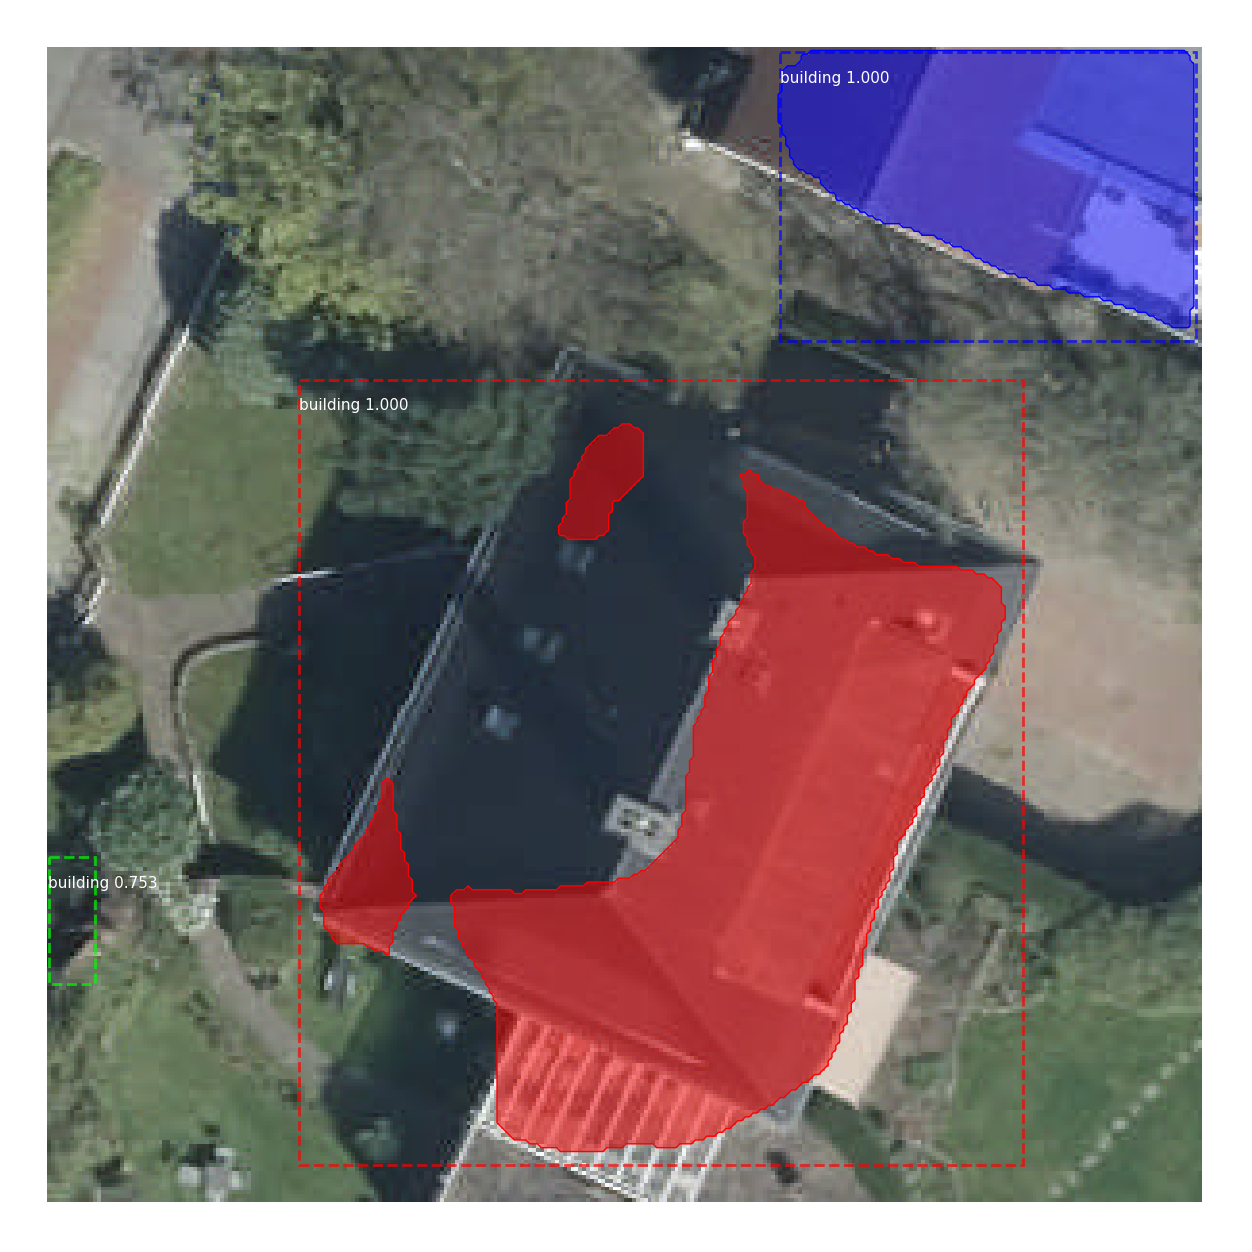

In [41]:
class_names = ['BG', 'building'] # In our case, we have 1 class for the background, and 1 class for building
#file_names = next(os.walk(IMAGE_DIR))[2]

image_path = r"C:\Users\bilge\OneDrive\Masaüstü\waermelyse\machine_learning\300x300_Annotationen\test_dataset\images\c01f90d4-tile_488821_5882686_png.png"

random_image = skimage.io.imread(image_path)

# Check if the image has 4 channels (RGBA)
if random_image.shape[-1] == 4:
    # Convert RGBA to RGB by dropping the alpha channel
    random_image = cv2.cvtColor(random_image, cv2.COLOR_RGBA2RGB)

# Resize the image to 300x300
resized_image = cv2.resize(random_image, (300, 300))

predictions = model_orig.detect([resized_image]*config.BATCH_SIZE, verbose=1) # We are replicating the same image to fill up the batch_size

p = predictions[0]
visualize.display_instances(resized_image, p['rois'], p['masks'], p['class_ids'], 
                            class_names, p['scores'])

# Transfer Learning

### Loading and preparing data

In [33]:
class CustomDataset(Dataset):
    def __init__(self, coco_json, images_dir, img_height=320, img_width=320):
        super().__init__()
        self.coco_json = coco_json
        self.images_dir = images_dir
        self.img_height = img_height
        self.img_width = img_width
        self.coco = COCO(coco_json)  # Load COCO annotations

    def load_data(self):
        # Add only 'Dächer' class to the dataset
        for category in self.coco.dataset['categories']:
            if category['name'] == 'roofs':  # Only add 'Dächer' class
                self.add_class("dataset", category['id'], category['name'])
        print("Classes added to dataset:", self.class_info)  # Debugging line

        # Add images to the dataset
        image_ids = self.coco.getImgIds()  # Get all image IDs in the dataset
        print(f"Found {len(image_ids)} images in COCO annotations.")  # Debugging line

        for img_id in image_ids:
            img_info = self.coco.loadImgs(img_id)[0]
            img_path = os.path.join(self.images_dir, img_info['file_name'])

            # Check if the image file exists
            if not os.path.exists(img_path):
                print(f"Warning: Image file {img_path} not found!")
                continue

            self.add_image(
                "dataset", 
                image_id=img_id,
                path=img_path,
                width=img_info['width'],
                height=img_info['height']
            )

        # Debugging: Check if dataset has been populated
        print(f"Dataset loaded with {len(self.image_info)} images.")
        self.debug_dataset()

    def debug_dataset(self):
        """Debugging function to check the contents of the dataset."""
        # Check if the images are correctly loaded
        if not self.image_info:
            print("Dataset is empty! No images were loaded.")
            return

        print("\nFirst 5 Images in Dataset:")
        for i, info in enumerate(self.image_info[:5]):
            print(f"Image {i + 1}:")
            print(f"  ID: {info['id']}")
            print(f"  Path: {info['path']}")
            print(f"  Dimensions: {info['width']} x {info['height']}")

        # Check class info
        print("\nClasses in Dataset:")
        for class_info in self.class_info:
            print(f"  Class ID: {class_info['id']}, Name: {class_info['name']}")

        # Check total counts
        print(f"\nTotal images: {len(self.image_info)}")
        print(f"Total classes: {len(self.class_info)}")




    def load_mask(self, image_id):
        """Generate instance masks for an image."""
        image_info = self.image_info[image_id]
        annotations = self.coco.loadAnns(self.coco.getAnnIds(imgIds=[image_info["id"]], catIds=[0], iscrowd=False))  # Adjusted category IDs

        # Initialize mask with zeros
        mask = np.zeros((image_info["height"], image_info["width"], len(annotations)), dtype=np.uint8)
        class_ids = []

        print(f"\nProcessing Image ID: {image_id}")
        print(f"  Image Path: {image_info['path']}")
        print(f"  Annotations Count: {len(annotations)}")

        for i, ann in enumerate(annotations):
            print(f"  Annotation {i + 1}/{len(annotations)} ID: {ann['id']}")
            if not ann.get("segmentation", []):
                print(f"    Warning: Annotation {ann['id']} has no segmentation. Skipping.")
                continue

            if isinstance(ann['segmentation'], list):
                for polygon in ann['segmentation']:
                    try:
                        rr, cc = skimage.draw.polygon(polygon[1::2], polygon[::2])
                        rr = np.clip(rr, 0, image_info["height"] - 1)
                        cc = np.clip(cc, 0, image_info["width"] - 1)
                        mask[rr, cc, i] = 1
                    except Exception as e:
                        print(f"    Error processing polygon for annotation {ann['id']}: {e}")

            else:
                print(f"    Skipping annotation {ann['id']} - unsupported segmentation format.")

            # Append class ID
            try:
                class_id = self.map_source_class_id("dataset.0")  # Update mapping if needed
                class_ids.append(class_id)
            except Exception as e:
                print(f"    Error mapping class ID for annotation {ann['id']}: {e}")

        print(f"  Generated Mask Shape: {mask.shape}")
        print(f"  Generated Class IDs: {class_ids}")

        # Ensure mask is in correct format
        return mask.astype(np.bool_), np.array(class_ids, dtype=np.int32)



    def image_reference(self, image_id):
        """Return the path to the image in the dataset."""
        return self.image_info[image_id]["path"]

    def preprocess_image(self, image):
        """Preprocess image: resize to fixed shape and normalize."""
        # Resize image to the fixed size (320x320)
        image_resized = cv2.resize(image, (self.img_width, self.img_height))
        # Normalize the image
        image_resized = image_resized.astype(np.float32)
        image_resized -= np.array([123.7, 116.8, 103.9], dtype=np.float32)  # Mean pixel values
        return image_resized

### Loading Data

In [31]:
print(os.getcwd())

c:\Users\MSI\Uni\master_projekt\waermelyse\machine_learning\roof_indentification


In [8]:
# Initialize the dataset
train_path_datasets = r"C:\Users\MSI\Uni\master_projekt\waermelyse\machine_learning\300x300_Annotationen\train_dataset"
train_json = r"C:\Users\MSI\Uni\master_projekt\waermelyse\machine_learning\300x300_Annotationen\train_dataset\result.json"

test_path_datasets = r"C:\Users\MSI\Uni\master_projekt\waermelyse\machine_learning\300x300_Annotationen\test_dataset"
test_json = r"C:\Users\MSI\Uni\master_projekt\waermelyse\machine_learning\300x300_Annotationen\test_dataset\result.json"

dataset_train = CustomDataset(coco_json=train_json, images_dir=train_path_datasets, img_height=320, img_width=320)
dataset_train.load_data()
dataset_train.prepare()

dataset_val = CustomDataset(coco_json=test_json, images_dir=test_path_datasets, img_height=320, img_width=320)
dataset_val.load_data()
dataset_val.prepare()
# Debugging: Check the contents of the dataset before starting training




loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
Classes added to dataset: [{'source': '', 'id': 0, 'name': 'BG'}, {'source': 'dataset', 'id': 0, 'name': 'roofs'}]
Found 110 images in COCO annotations.
Dataset loaded with 110 images.

First 5 Images in Dataset:
Image 1:
  ID: 0
  Path: C:\Users\MSI\Uni\master_projekt\waermelyse\machine_learning\300x300_Annotationen\train_dataset\images\eab24f94-tile_488669_5881989_png.png
  Dimensions: 300 x 300
Image 2:
  ID: 1
  Path: C:\Users\MSI\Uni\master_projekt\waermelyse\machine_learning\300x300_Annotationen\train_dataset\images\86027210-tile_488669_5882019_png.png
  Dimensions: 300 x 300
Image 3:
  ID: 2
  Path: C:\Users\MSI\Uni\master_projekt\waermelyse\machine_learning\300x300_Annotationen\train_dataset\images\fc03e15c-tile_488669_5882050_png.png
  Dimensions: 300 x 300
Image 4:
  ID: 3
  Path: C:\Users\MSI\Uni\master_projekt\waermelyse\machine_learning\300x300_Annotationen\train_dataset\images\d2e67a22-tile

### Loading Model

In [42]:
class TrainingConfig(coco.CocoConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1  # Increase if GPU memory allows
    NUM_CLASSES = 1 + 1 # Background + 1 building !!! needs to be 3 if tree and roof detections simultaneously
    LEARNING_RATE = 1e-4
    STEPS_PER_EPOCH = 110  # Adjust based on dataset size
    VALIDATION_STEPS = 17
    IMAGE_MAX_DIM=320
    IMAGE_MIN_DIM=320

In [43]:
model = modellib.MaskRCNN(mode="training", config=TrainingConfig(), model_dir=ROOT_DIR)

# Load COCO pre-trained weights
model.load_weights(COCO_MODEL_PATH, by_name=True, exclude=[
    "mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"
])

### Freeze first layers

In [11]:
# Freeze specific layers
for layer in model.keras_model.layers:
    if "conv1" in layer.name or "conv2" in layer.name or "conv3" in layer.name:
        layer.trainable = False  # Freeze early layers (low-level features)
    else:
        layer.trainable = True  # Fine-tune the rest of the layers

### Training Model

In [14]:
import tensorflow as tf

# Create a session with device placement logging
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

# Run a simple operation to see if GPU is used
hello = tf.constant("Hello, TensorFlow!")
print(sess.run(hello))

b'Hello, TensorFlow!'


In [12]:
model.train(dataset_train, dataset_val,
            learning_rate=TrainingConfig.LEARNING_RATE,
            epochs=5,
            layers="heads") 



Starting at epoch 0. LR=0.0001

Checkpoint Path: C:\Users\MSI\Uni\master_projekt\waermelyse\machine_learning\roof_indentification\coco20250115T1518\mask_rcnn_coco_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)


c:\Users\MSI\Uni\master_projekt\waermelyse\myenv\lib\site-packages\tensorflow\python\ops\gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
c:\Users\MSI\Uni\master_projekt\waermelyse\myenv\lib\site-packages\tensorflow\python\ops\gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
c:\Users\MSI\Uni\master_projekt\waermelyse\myenv\lib\site-packages\tensorflow\python\ops\gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "




Epoch 1/5

Processing Image ID: 16
  Image Path: C:\Users\MSI\Uni\master_projekt\waermelyse\machine_learning\300x300_Annotationen\train_dataset\images\9320c166-tile_488699_5882050_png.png
  Annotations Count: 5
  Annotation 1/5 ID: 57
  Annotation 2/5 ID: 58
  Annotation 3/5 ID: 59
  Annotation 4/5 ID: 60
  Annotation 5/5 ID: 61
  Generated Mask Shape: (300, 300, 5)
  Generated Class IDs: [1, 1, 1, 1, 1]
  1/110 [..............................] - ETA: 58:19 - loss: 2.3373 - rpn_class_loss: 0.0355 - rpn_bbox_loss: 0.2642 - mrcnn_class_loss: 0.7177 - mrcnn_bbox_loss: 0.6419 - mrcnn_mask_loss: 0.6780
Processing Image ID: 39
  Image Path: C:\Users\MSI\Uni\master_projekt\waermelyse\machine_learning\300x300_Annotationen\train_dataset\images\d2e67a22-tile_488669_5882080_png.png
  Annotations Count: 3
  Annotation 1/3 ID: 129
  Annotation 2/3 ID: 130
  Annotation 3/3 ID: 131
  Generated Mask Shape: (300, 300, 3)
  Generated Class IDs: [1, 1, 1]
  2/110 [..............................] - ETA:

## Evaluation

In [44]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 1 + 1  # 1 Background + 1 Building
    IMAGE_MAX_DIM=320
    IMAGE_MIN_DIM=320   
config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  320
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  320
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [320 320   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE             

In [45]:
COCO_MODEL_PATH = r"C:\Users\MSI\Uni\master_projekt\waermelyse\machine_learning\roof_indentification\coco20250115T1518\mask_rcnn_coco_0005.h5"
ROOT_DIR = r"C:\Users\MSI\Uni\master_projekt\waermelyse\machine_learning\roof_indentification"
print("loading mask R-CNN model")
model = modellib.MaskRCNN(mode="inference", config=config, model_dir=ROOT_DIR)
#-------------- Load weights trained on MS-COCO -------------------------------
model.load_weights(COCO_MODEL_PATH, by_name=True)
# Access the internal Keras model and print its summary
model.keras_model.summary()

loading mask R-CNN model
Re-starting from epoch 5
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        (None, None, None, 3 0                                            
__________________________________________________________________________________________________
zero_padding2d_6 (ZeroPadding2D (None, None, None, 3 0           input_image[0][0]                
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        zero_padding2d_6[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNorm)            (None, None, None, 6 256         conv1[0][0]                      
___________________________________________________________

Processing 1 images
image                    shape: (300, 300, 3)         min:    6.00000  max:  255.00000  uint8
molded_images            shape: (1, 320, 320, 3)      min: -111.70000  max:  146.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  320.00000  float64
anchors                  shape: (1, 25575, 4)         min:   -1.13492  max:    1.93429  float32


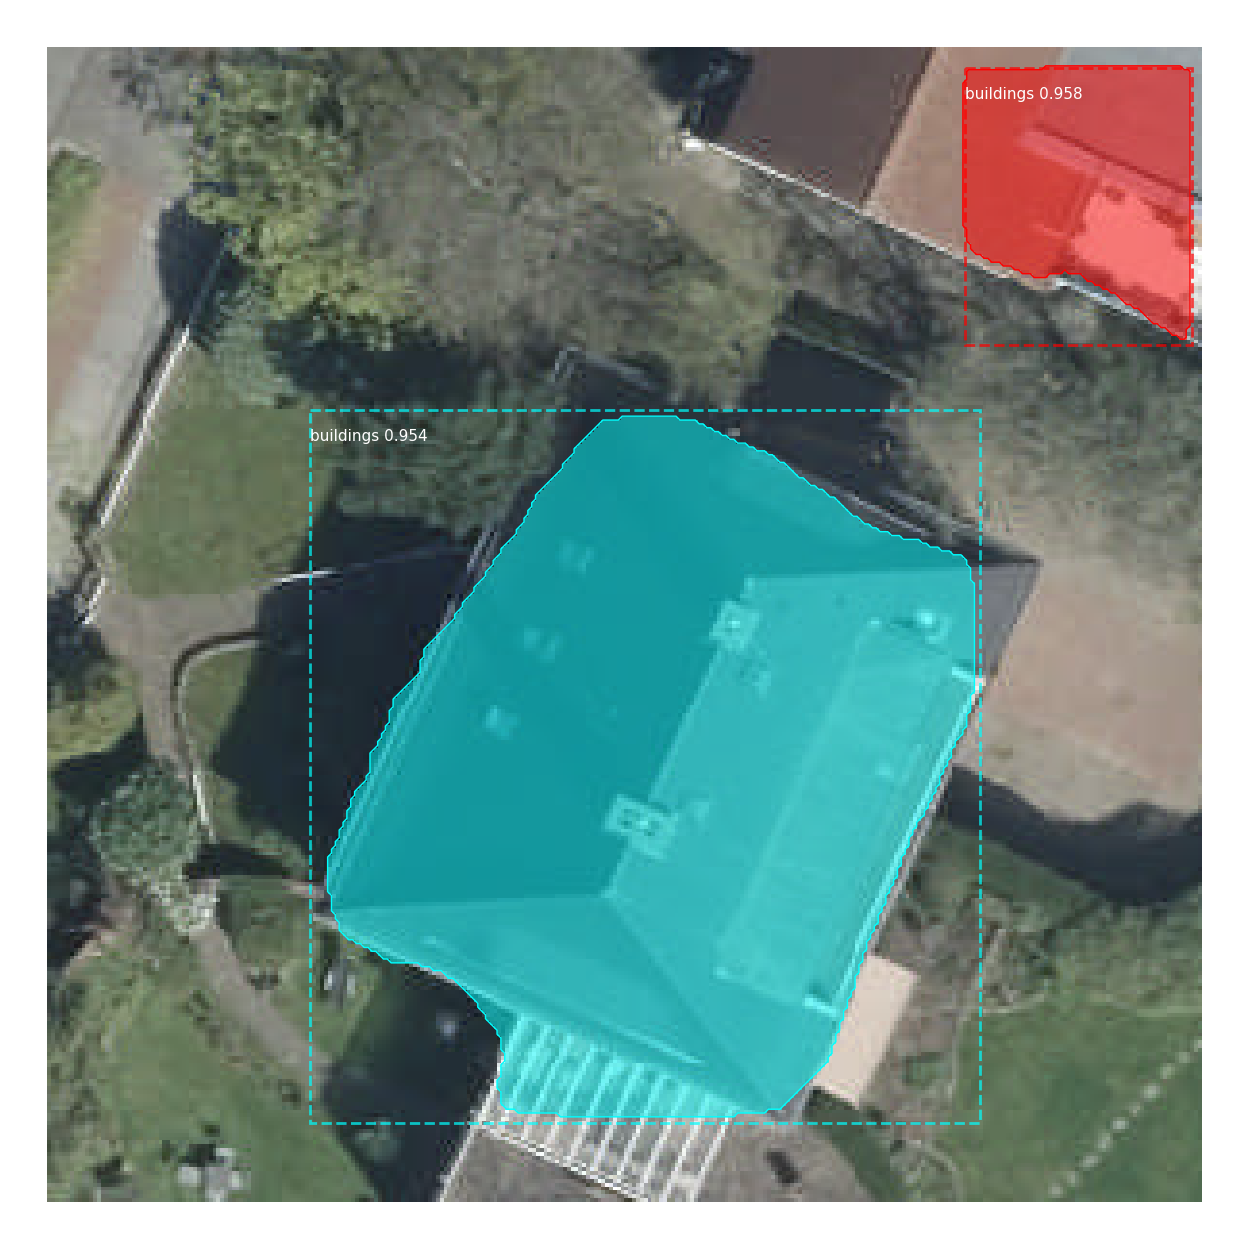

In [46]:
class_names = ['BG', 'buildings'] # In our case, we have 1 class for the background, and 1 class for building
#file_names = next(os.walk(IMAGE_DIR))[2]

image_path = r"C:\Users\MSI\Uni\master_projekt\waermelyse\machine_learning\300x300_Annotationen\test_dataset\images\c01f90d4-tile_488821_5882686_png.png"

random_image = skimage.io.imread(image_path)

# Check if the image has 4 channels (RGBA)
if random_image.shape[-1] == 4:
    # Convert RGBA to RGB by dropping the alpha channel
    random_image = cv2.cvtColor(random_image, cv2.COLOR_RGBA2RGB)

# Resize the image to 300x300
resized_image = cv2.resize(random_image, (300, 300))

# Ensure the input batch has the correct shape
predictions = model.detect([resized_image] * config.BATCH_SIZE, verbose=1)

p = predictions[0]
visualize.display_instances(resized_image, p['rois'], p['masks'], p['class_ids'], 
                            class_names, p['scores'])

Available scalar tags: ['val_loss', 'val_rpn_class_loss', 'val_rpn_bbox_loss', 'val_mrcnn_class_loss', 'val_mrcnn_bbox_loss', 'val_mrcnn_mask_loss', 'loss', 'rpn_class_loss', 'rpn_bbox_loss', 'mrcnn_class_loss', 'mrcnn_bbox_loss', 'mrcnn_mask_loss']


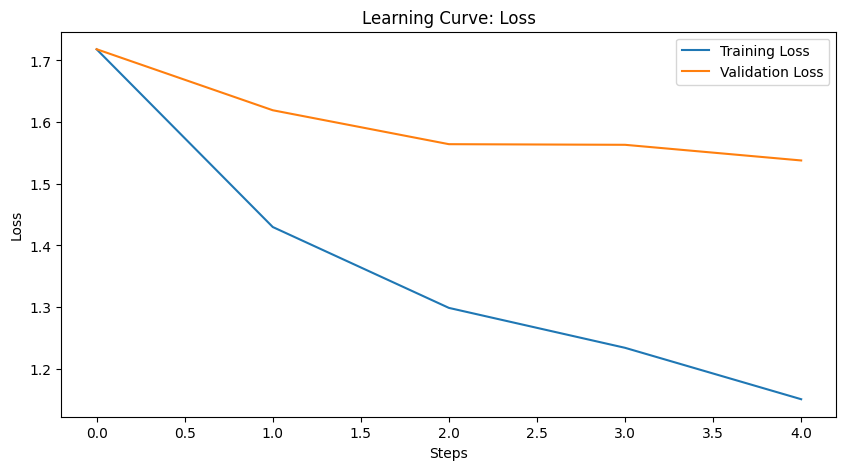

In [31]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator
#event_file = r"C:\Users\MSI\Uni\master_projekt\waermelyse\machine_learning\roof_indentification\coco20250115T1518\events.out.tfevents.1736950764.DESKTOP-PNO6TBG"

def parse_tensorboard_log(log_file):
    # Initialize the event accumulator
    ea = event_accumulator.EventAccumulator(log_file)
    ea.Reload()

    # Extract scalar keys (metrics logged)
    scalar_keys = ea.Tags()['scalars']

    # Create a dictionary to store all extracted data
    metrics = {key: [] for key in scalar_keys}

    # Extract values for each scalar key
    for key in scalar_keys:
        events = ea.Scalars(key)
        for event in events:
            metrics[key].append((event.step, event.value))

    return metrics

def plot_learning_curves(metrics):
    # Plot training and validation loss
    if 'loss' in metrics and 'val_loss' in metrics:
        train_steps, train_loss = zip(*metrics['loss'])
        val_steps, val_loss = zip(*metrics['val_loss'])

        plt.figure(figsize=(10, 5))
        plt.plot(train_steps, train_loss, label='Training Loss')
        plt.plot(val_steps, val_loss, label='Validation Loss')
        plt.xlabel('Steps')
        plt.ylabel('Loss')
        plt.title('Learning Curve: Loss')
        plt.legend()
        plt.show()

    # Plot accuracy (if available)
    if 'accuracy' in metrics and 'val_accuracy' in metrics:
        train_steps, train_acc = zip(*metrics['accuracy'])
        val_steps, val_acc = zip(*metrics['val_accuracy'])

        plt.figure(figsize=(10, 5))
        plt.plot(train_steps, train_acc, label='Training Accuracy')
        plt.plot(val_steps, val_acc, label='Validation Accuracy')
        plt.xlabel('Steps')
        plt.ylabel('Accuracy')
        plt.title('Learning Curve: Accuracy')
        plt.legend()
        plt.show()

# Specify the log file path
log_file = "coco20250115T1518\events.out.tfevents.1736950764.DESKTOP-PNO6TBG"

ea = event_accumulator.EventAccumulator(log_file)
ea.Reload()

# List all available scalar tags
scalar_tags = ea.Tags()['scalars']
print("Available scalar tags:", scalar_tags)
if os.path.exists(log_file):
    metrics = parse_tensorboard_log(log_file)
    plot_learning_curves(metrics)
else:
    print(f"Log file not found: {log_file}")

Processing 1 images
image                    shape: (300, 300, 3)         min:    6.00000  max:  255.00000  uint8
molded_images            shape: (1, 320, 320, 3)      min: -111.70000  max:  146.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  320.00000  float64
anchors                  shape: (1, 25575, 4)         min:   -1.13492  max:    1.93429  float32
Processing 1 images
image                    shape: (300, 300, 3)         min:    6.00000  max:  255.00000  uint8
molded_images            shape: (1, 320, 320, 3)      min: -111.70000  max:  146.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  320.00000  float64
anchors                  shape: (1, 25575, 4)         min:   -1.13492  max:    1.93429  float32


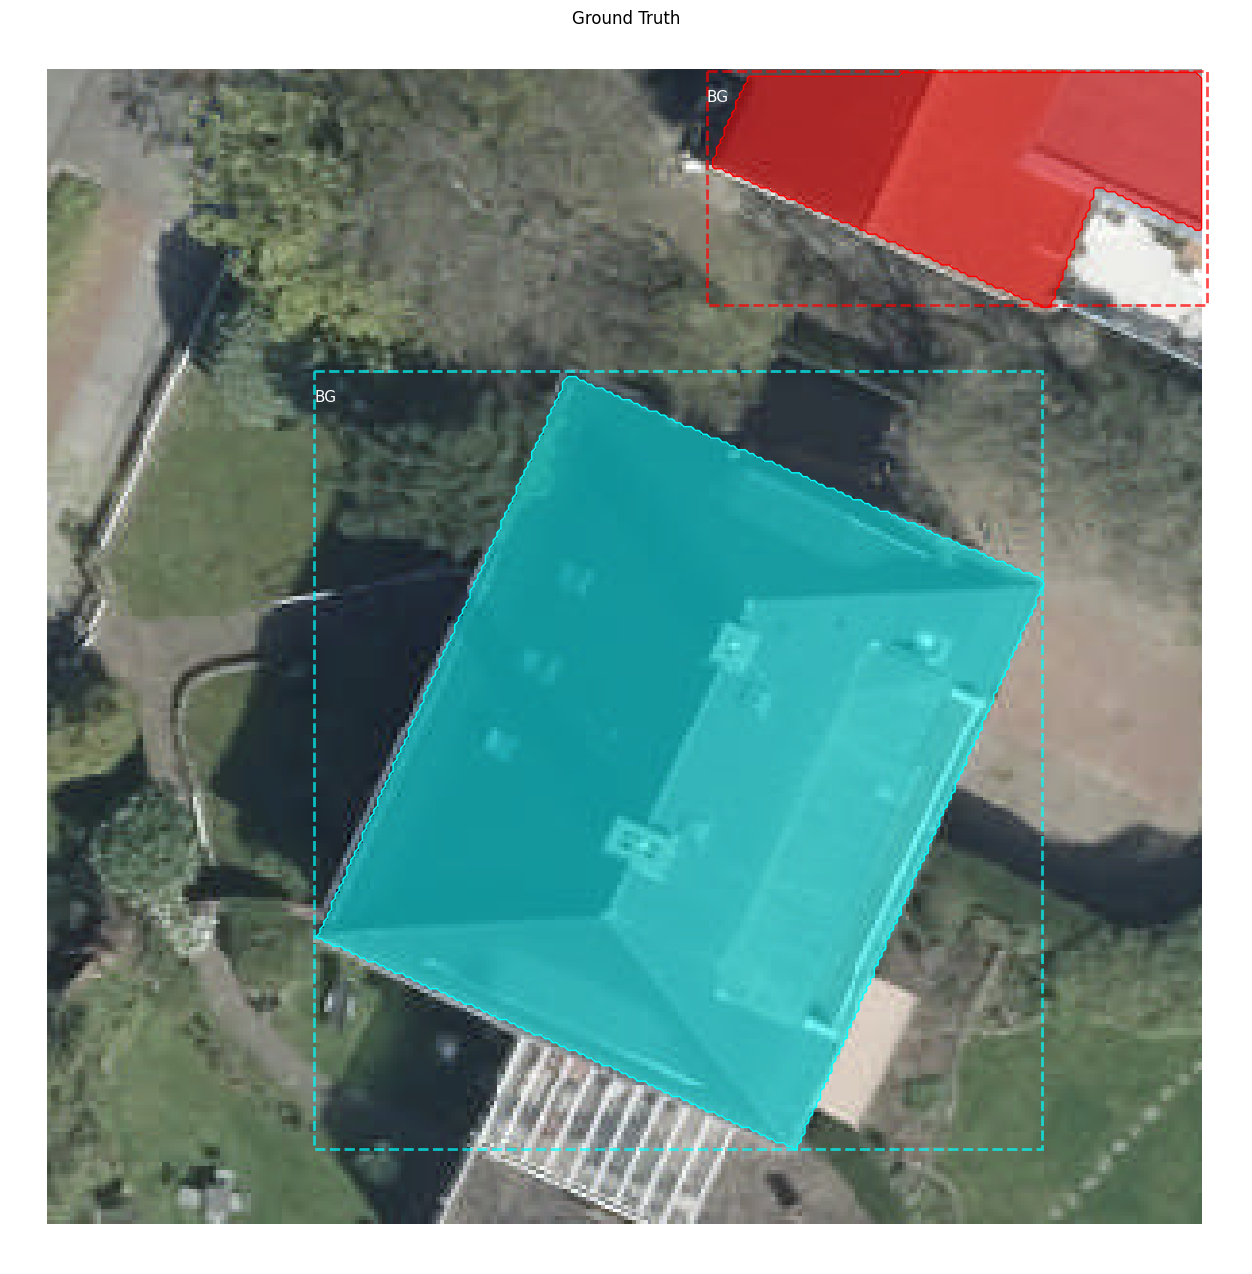

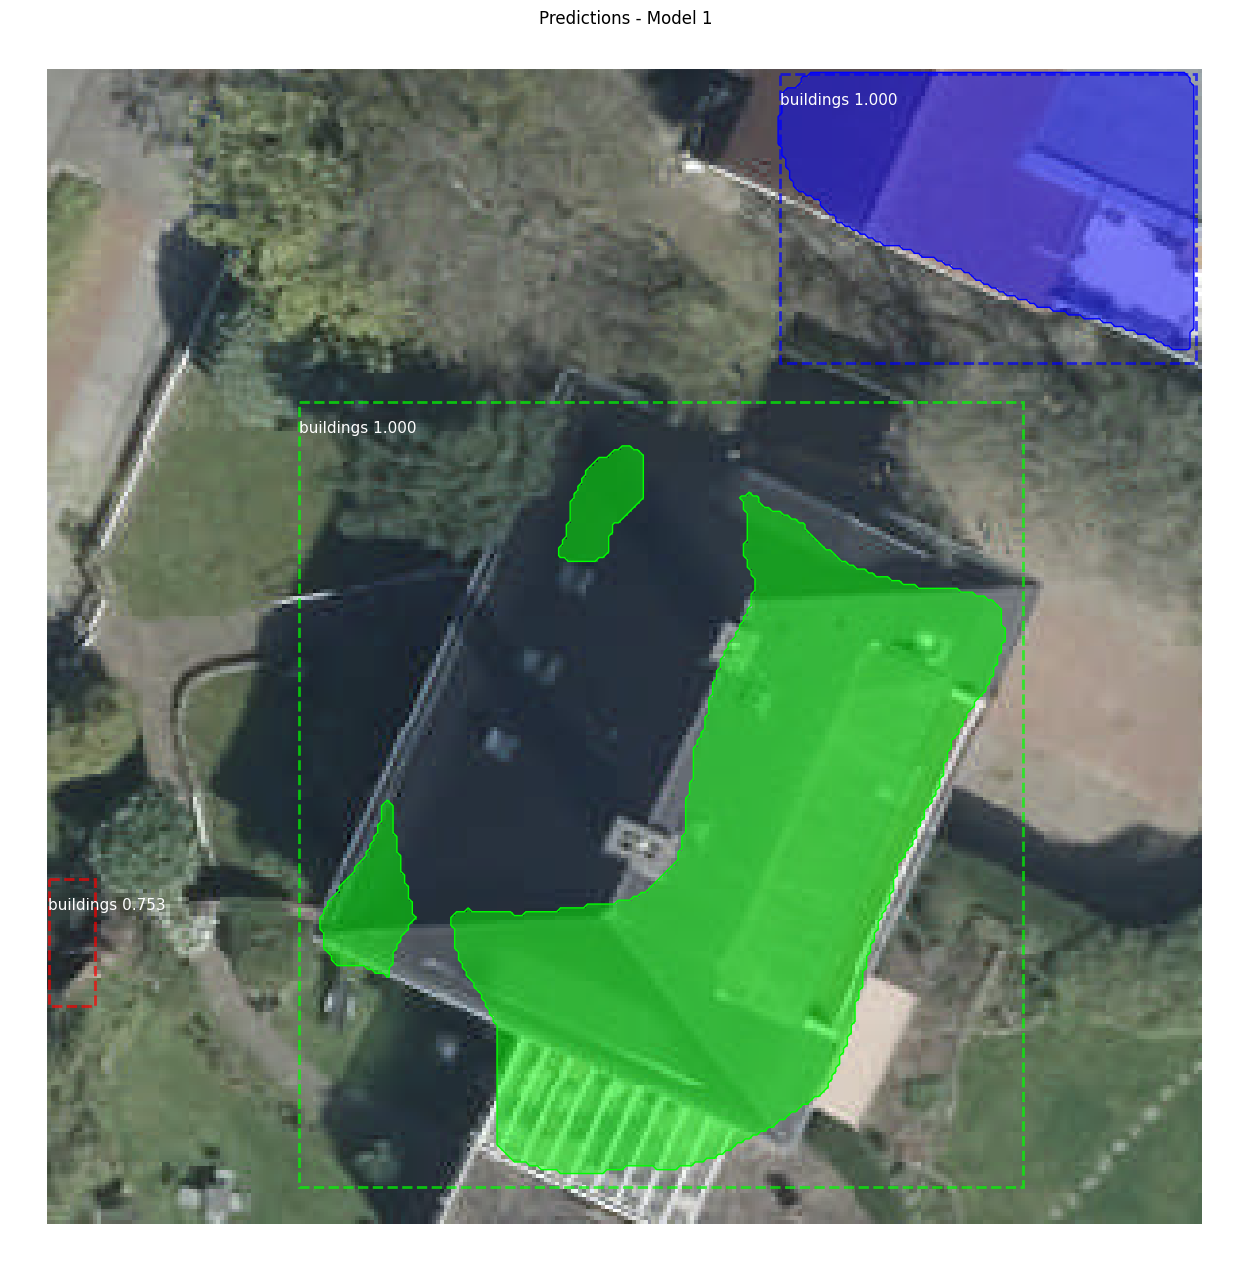

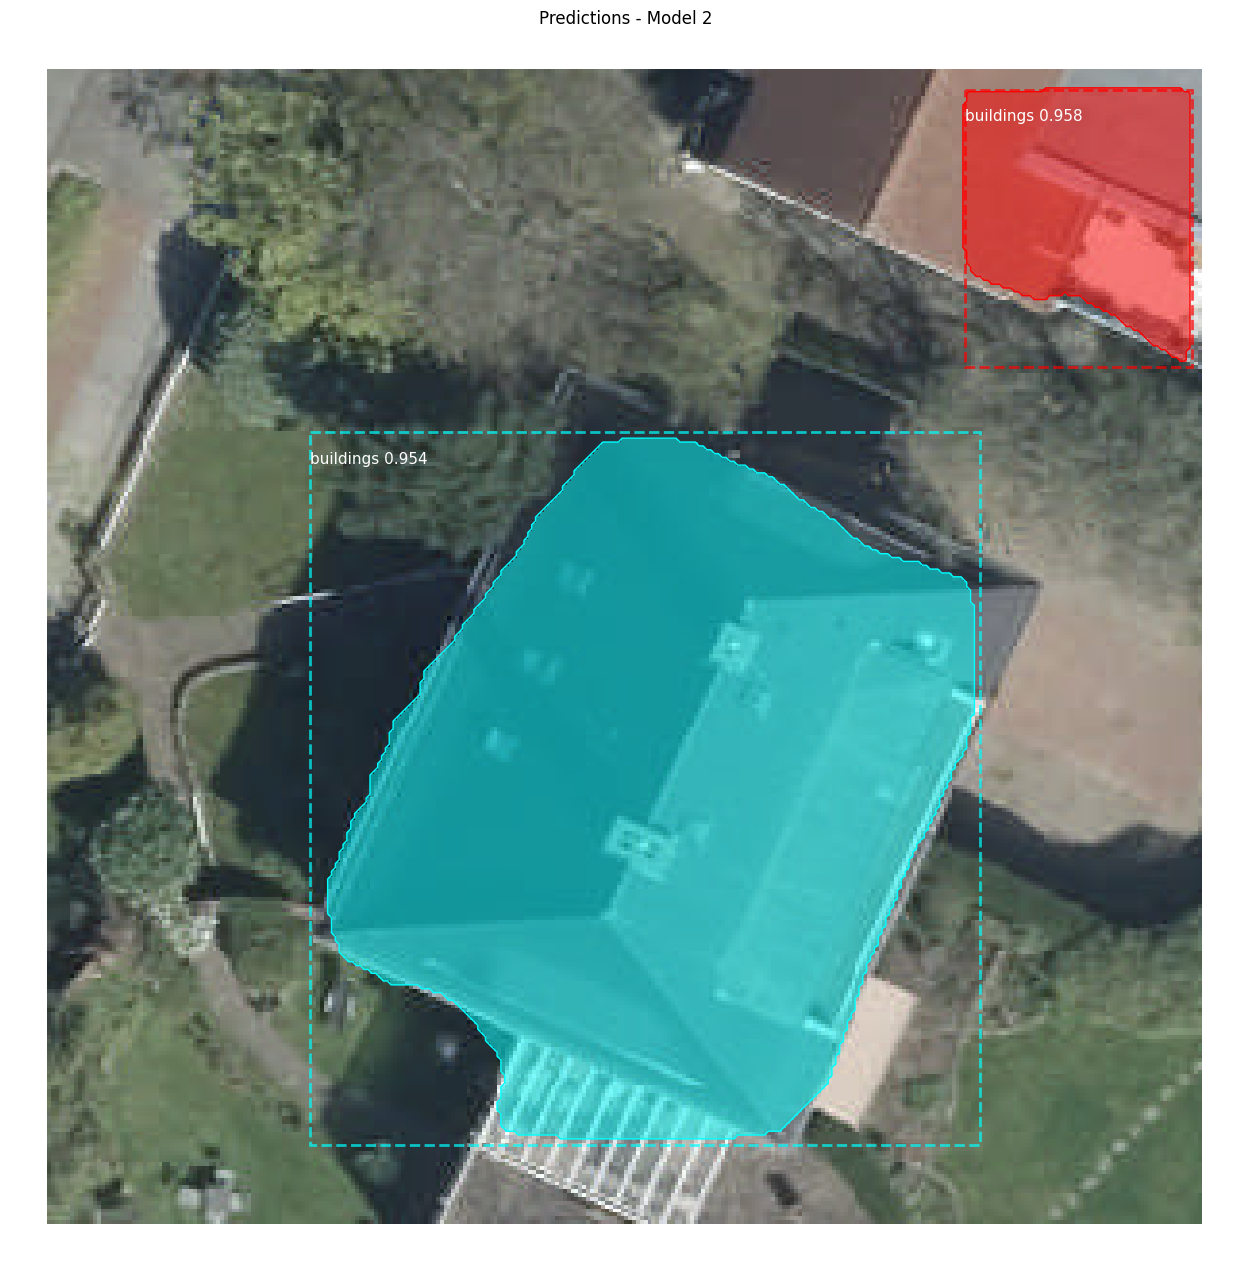

In [61]:
import json
import skimage.io
import cv2
import numpy as np
from mrcnn import visualize
from mrcnn import model as mrcnn_model
import os
from shapely.geometry import Polygon
from skimage.draw import polygon

# Define class names (adjust as per your dataset)
class_names = ['BG', 'buildings']

# Load COCO annotations
def load_coco_annotations(coco_json_path):
    with open(coco_json_path, 'r') as f:
        coco_data = json.load(f)
    return coco_data

# Get ground truth for a specific image
def get_ground_truth_for_image(coco_data, image_name):
    image_id = None
    for image in coco_data['images']:
        if image['file_name'] == image_name:
            image_id = image['id']
            break

    if image_id is None:
        raise ValueError(f"Image with name {image_name} not found in the dataset.")

    # Extract annotations for this image
    annotations = []
    for annotation in coco_data['annotations']:
        if annotation['image_id'] == image_id:
            annotations.append(annotation)

    # Prepare ground truth data (rois, masks, class_ids)
    rois = []
    masks = []
    class_ids = []

    for annotation in annotations:
        bbox = annotation['bbox']  # [x, y, width, height]
        rois.append([int(bbox[1]), int(bbox[0]), int(bbox[1] + bbox[3]), int(bbox[0] + bbox[2])])
        
        # Create mask from polygon
        if 'segmentation' in annotation and annotation['segmentation']:
            # The segmentation is a list of polygons
            mask = np.zeros((300, 300), dtype=np.uint8)  # Create an empty mask
            for poly in annotation['segmentation']:
                # Convert the polygon points into a mask
                poly = np.array(poly).reshape((len(poly) // 2, 2))  # Reshape polygon points into (x, y) pairs
                polygon_shape = Polygon(poly)  # Create the polygon
                
                # Check if the polygon is valid and fill it on the mask
                if polygon_shape.is_valid:
                    rr, cc = polygon(poly[:, 1], poly[:, 0], mask.shape)  # Create a polygon on the mask
                    mask[rr, cc] = 1  # Fill the polygon area with 1
            masks.append(mask)
        else:
            masks.append(np.zeros((300, 300), dtype=np.uint8))  # If no polygon, create an empty mask

        class_ids.append(annotation['category_id'])

    # Ensure that all masks have the same shape (height, width, num_instances)
    if len(masks) > 0:
        masks = np.stack(masks, axis=-1)  # Shape (height, width, num_instances)
    else:
        masks = np.zeros((300, 300, 0), dtype=np.uint8)  # Empty masks, handle empty case
        
    return {'rois': np.array(rois), 'masks': masks, 'class_ids': np.array(class_ids)}

# Specify the image path and COCO annotations JSON file path
image_path = r"C:\Users\MSI\Uni\master_projekt\waermelyse\machine_learning\300x300_Annotationen\test_dataset\images\c01f90d4-tile_488821_5882686_png.png"
coco_json_path = r"C:\Users\MSI\Uni\master_projekt\waermelyse\machine_learning\300x300_Annotationen\test_dataset\result.json"  # Update with the actual path to the COCO annotations file

# Load the image
random_image = skimage.io.imread(image_path)

# Check if the image has 4 channels (RGBA) and convert to RGB if necessary
if random_image.shape[-1] == 4:
    random_image = cv2.cvtColor(random_image, cv2.COLOR_RGBA2RGB)

# Resize the image to 300x300
resized_image = cv2.resize(random_image, (300, 300))

# Extract the ground truth annotations from COCO file based on image name
image_name = image_path.split("\\")[-1]  # Extract the file name from the full path
full_name = os.path.join("images", image_name)
coco_data = load_coco_annotations(coco_json_path)
ground_truth_data = get_ground_truth_for_image(coco_data, full_name)

# Load the first pre-trained model
# model1 = load_model('path_to_weights_1.h5')  # Replace with your method to load model
predictions1 = model_orig.detect([resized_image], verbose=1)
p1 = predictions1[0]

# Load the second pre-trained model
# model2 = load_model('path_to_weights_2.h5')  # Replace with your method to load model
predictions2 = model.detect([resized_image], verbose=1)
p2 = predictions2[0]

# Visualize the ground truth
visualize.display_instances(
    resized_image, 
    ground_truth_data['rois'], 
    ground_truth_data['masks'], 
    ground_truth_data['class_ids'], 
    class_names, 
    title="Ground Truth"
)

# Visualize predictions from the first model
visualize.display_instances(
    resized_image, 
    p1['rois'], 
    p1['masks'], 
    p1['class_ids'], 
    class_names, 
    p1['scores'], 
    title="Predictions - Model 1"
)

# Visualize predictions from the second model
visualize.display_instances(
    resized_image, 
    p2['rois'], 
    p2['masks'], 
    p2['class_ids'], 
    class_names, 
    p2['scores'], 
    title="Predictions - Model 2"
)
